## Initial Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
from tools import *
import pandas as pd
import numpy as np
import datetime as dt
from random import randint

/home/gareth/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


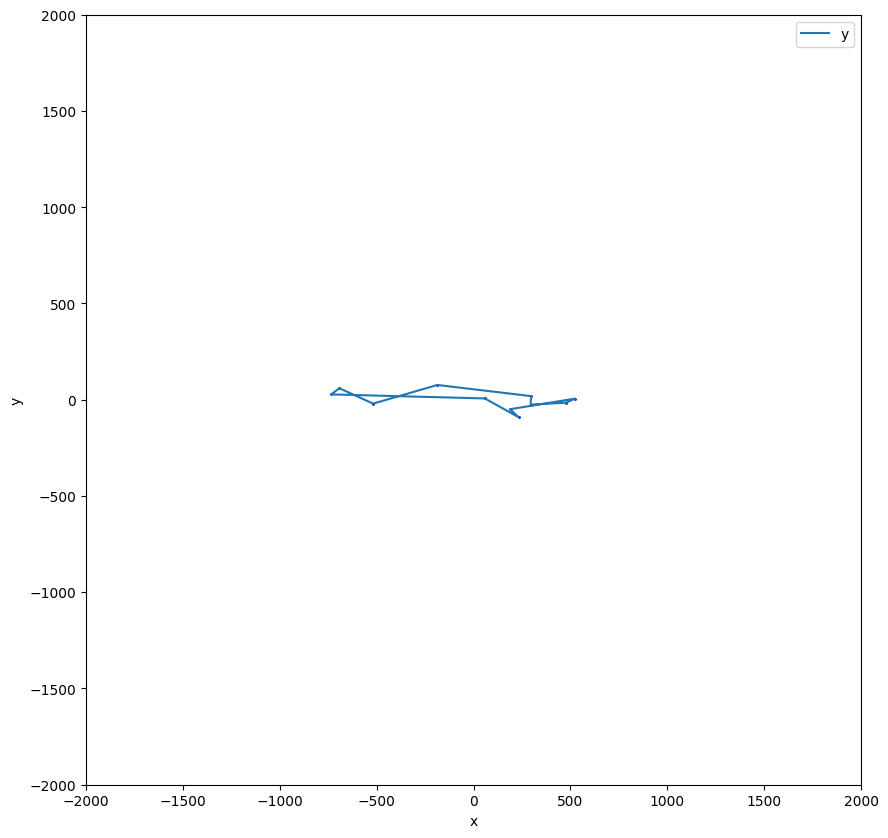

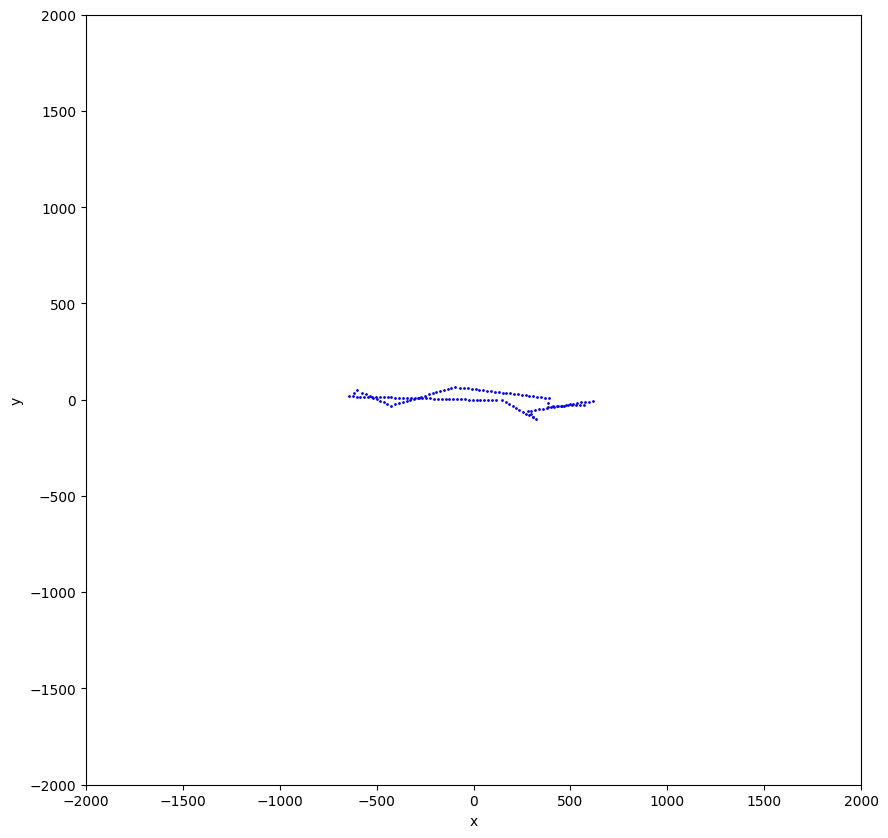

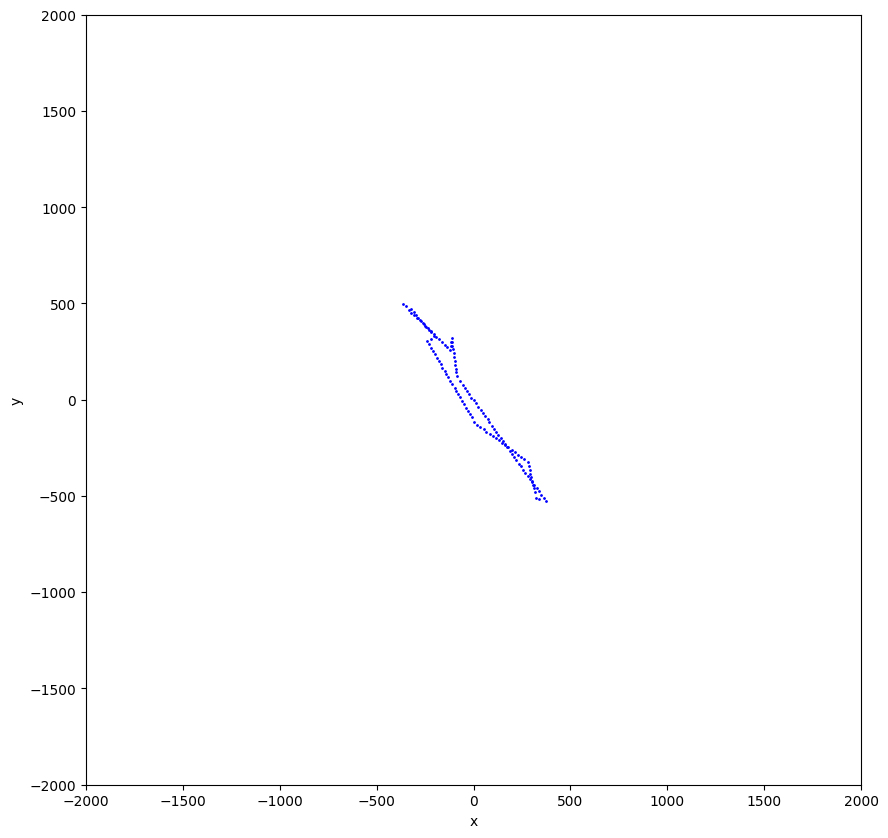

In [31]:
def random_out_and_back():
    forward_num_steps = randint(5, 10)
    backward_num_steps = randint(5, 10)
    random_walk = pd.DataFrame(index=range(forward_num_steps + backward_num_steps + 1), columns=["x", "y"])

    random_walk.iloc[0] = (0, 0)

    for i in range(1, forward_num_steps):
        random_walk.iloc[i] = (randint(-50, 500), randint(-100, 100))
    
    for i in range(forward_num_steps, forward_num_steps + backward_num_steps):
        random_walk.iloc[i] = (randint(-500, 50), randint(-100, 100))

    random_walk = (
        random_walk
        .assign(x=lambda x: x.x.cumsum())
        .assign(y=lambda x: x.y.cumsum())
    )

    random_walk.iloc[-1] = (0, 0)

    return random_walk


def out_and_back():
    MEAN = 0
    STD_DEV = 4
    forward_num_steps = randint(5, 15)
    random_walk = pd.DataFrame(index=range(forward_num_steps * 2 - 1), columns=["x", "y"])

    random_walk.iloc[0] = (0, 0)

    for i in range(1, forward_num_steps):
        rand_vect = (randint(-50, 500), randint(-100, 100))
        random_walk.iloc[i] = rand_vect
        random_walk.iloc[-i] = (-rand_vect[0] + np.random.normal(loc=MEAN, scale=STD_DEV), 
                                -rand_vect[1] + np.random.normal(loc=MEAN, scale=STD_DEV))
    
    random_walk = (
        random_walk
        .assign(x=lambda x: x.x.cumsum())
        .assign(y=lambda x: x.y.cumsum())
    )

    return random_walk


def loop():
    num_steps = randint(3, 5)

    random_walk = pd.DataFrame(index=range(num_steps + 1), columns=["x", "y"])
    random_walk.iloc[0] = (0, 0)

    cum_angle = 0

    for i in range(1, num_steps):
        cum_angle += np.pi / 4 + np.random.random() * np.pi / 2
        length = randint(200, 1000)

        random_walk.iloc[i] = (length * np.cos(cum_angle), length * np.sin(cum_angle))

    random_walk = (
        random_walk
        .assign(x=lambda x: x.x.cumsum())
        .assign(y=lambda x: x.y.cumsum())
    )

    random_walk.iloc[-1] = (0, 0)

    return random_walk


def sample(df):
    STEP_SIZE = 20

    points = pd.DataFrame(columns=["x", "y"])
    for i in range(1, len(df)):
        new_points = []
        diff_vec = (df.iloc[i].x - df.iloc[i-1].x, df.iloc[i].y - df.iloc[i-1].y)
        seg_length = (diff_vec[0]**2 + diff_vec[1]**2) ** 0.5
        unit_vec = (diff_vec[0] / seg_length, diff_vec[1] / seg_length)

        for j in range(int(seg_length) // STEP_SIZE):
            new_points.append((df.iloc[i-1].x + j * STEP_SIZE * unit_vec[0], df.iloc[i-1].y + j * STEP_SIZE * unit_vec[1]))

        points = pd.concat([points, pd.DataFrame(new_points, columns = ["x", "y"])])

    return points


def randomise_location(df):
    STD_DEV = 1
    df.x = np.random.normal(loc=df['x'], scale=STD_DEV)
    df.y = np.random.normal(loc=df['y'], scale=STD_DEV)
    return df


def randomise_rotation(df):
    # https://academo.org/demos/rotation-about-point/ 
    angle = np.random.random() * 2 * np.pi

    c, s = np.cos(angle), np.sin(angle)
    j = np.array([[c, s], [-s, c]])
    m = np.dot(j, [df.x, df.y])

    df.x = m[0]
    df.y = m[1]
    return df


def randomise_points(df):
    return randomise_location(randomise_rotation(df))



points = random_out_and_back()
consistent_scale_plot(points, "x", "y", connected=True)
consistent_scale_plot(sample(points), "x", "y")
consistent_scale_plot(randomise_points(sample(points)))